In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plot_constants as pltconst

# Load market and price data and also the target variable of closing price
tezos_dir = "../../Data/Tezos/DataDuringProcessing/DataFullTimePeriod/"
casper_dir = "../../Data/Casper/Final/"

# TEZOS

## Computing the cross correlation values for all input variables

Load all of the data collected and for each variable except the date, compute the cross correlation value between the variable and target price. Store results in a data frame.

In [24]:
# Function for cross correlation calculation
def get_correlation_coef(x, y, lag):
    if lag != 0:
        x = np.roll(x, shift=lag)
        x = x[lag:]

    temp = np.correlate(x, y, mode='valid')
    corr = temp / (np.linalg.norm(x) * np.linalg.norm(y))

    corr_coef = round(corr[0], 4)
    return corr_coef

In [35]:
def get_ccf_df(dir_with_input_files, market_file_name, price_column_name):
    CCF = []

    y = pd.read_csv(dir_with_input_files + market_file_name)[price_column_name]
    # Loop through all data and calculate pairwise cross correlation between variables and closing price
    for file in os.listdir(dir_with_input_files):
        file_is_market = False
        if file == market_file_name:
            file_is_market = True

        df = pd.read_csv(dir_with_input_files + file)

        for col in df.columns:
            # Exclude the date column
            if col.lower() == "date": continue
            if file_is_market and col.lower() == price_column_name: 
                continue
                
            x = df[col]
            if get_correlation_coef(x, y, 0) is None:
                print(x)

            CCF.append({"Variable": col, "Correlation": get_correlation_coef(x, y, 0), "Correlation3":get_correlation_coef(x, y, 3), "Correlation7":get_correlation_coef(x, y, 7), "Correlation30":get_correlation_coef(x, y, 30)})

    # Save the results in df form
    ccf_results = pd.DataFrame.from_dict(CCF)
    ccf_results = ccf_results.sort_values(by=["Correlation", "Correlation3", "Correlation7"], ascending=False).reset_index(drop=True)
    return ccf_results

In [ ]:
ccf_results = get_ccf_df(tezos_dir, "MarketAndPriceWithTI.csv", "close")

In [ ]:
ccf_results.to_csv(non_input_data_dir + "Cross_correlation_results.csv", index=False)

In [61]:
ccf_results_casper = get_ccf_df(casper_dir, "Market.csv", "current_price")
ccf_results_casper

,Variable,Correlation,Correlation3,Correlation7,Correlation30
0,EMA_3,0.9989,0.9842,0.9669,0.9161
1,SMA_3,0.9982,0.9837,0.9662,0.9153
2,EMA_7,0.9959,0.9813,0.9631,0.9156
3,SMA_7,0.9945,0.9802,0.9619,0.9141
4,EMA_30,0.9759,0.9613,0.9434,0.9144
5,LTC_price,0.9718,0.9670,0.9620,0.9358
6,ETH_price,0.9717,0.9648,0.9562,0.9194
7,ETH_market_caps,0.9700,0.9631,0.9545,0.9170
8,LTC_market_caps,0.9692,0.9645,0.9595,0.9327
9,XRP_price,0.9661,0.9608,0.9558,0.9281


In [62]:
ccf_results_casper.to_csv("../../Data/Casper/CorrelationAndSegmentation/Correlation_results.csv", index=False)

## Plot results of CCF

In [95]:
ccf_tezos = pd.read_csv("/mnt/Ivana/Data/Tezos/CorrelationAndSegmentation/Cross_correlation_results.csv")
pltconst.set_plot_parameters()

Text(0.5, 1.0, 'Results of the CCF Analysis')

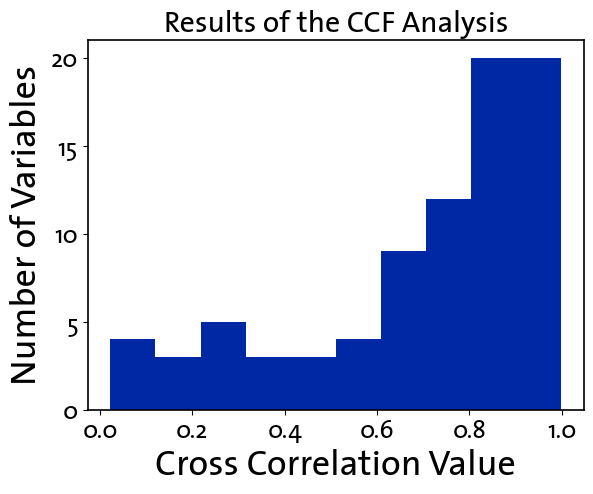

In [96]:
# Plot the histogram of all cross correlation results
plt.hist(ccf_tezos.Correlation)
plt.xlabel("Cross Correlation Value")
plt.ylabel("Number of Variables")
plt.title("Results of the CCF Analysis")

Accounts.csv
Contracts.csv
MarketAndPriceWithTI.csv
OtherBlockchainPrices.csv
Social.csv
Supply.csv
Tzstats_transaction_daily.csv
Voting.csv


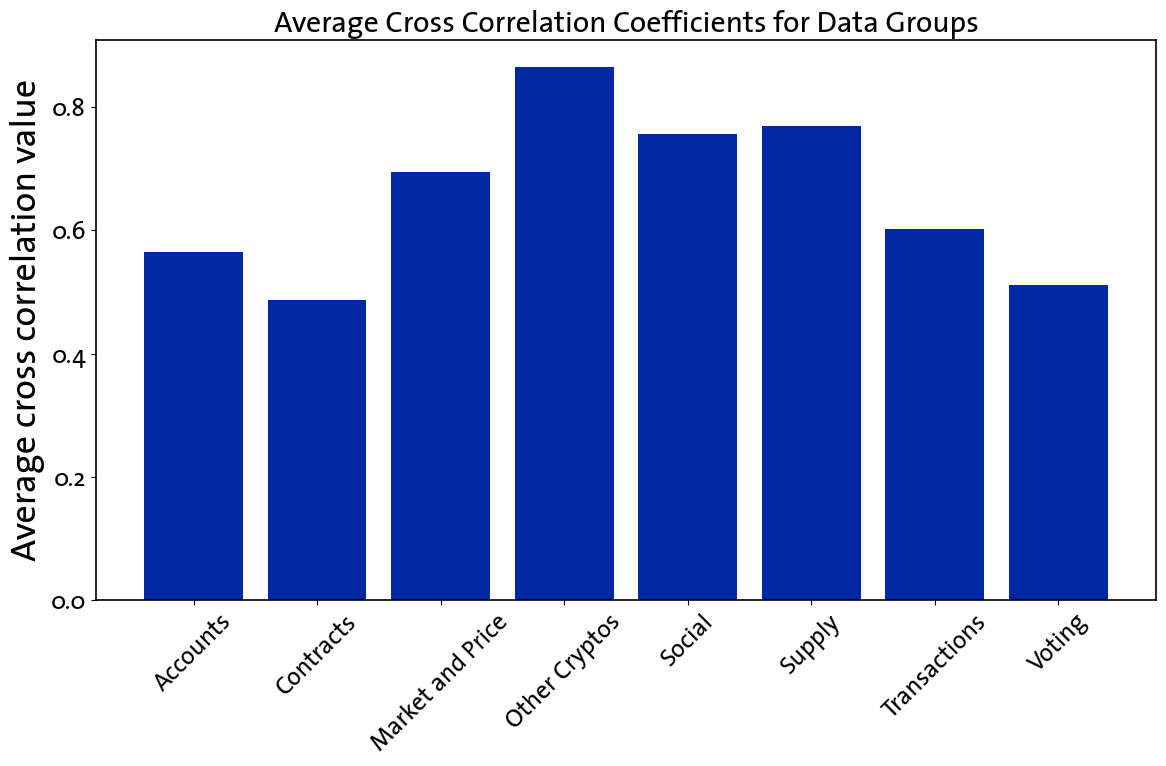

In [97]:
# Plot the average cross correlation results per data group
file_name = None

new_results = {}
variable_groups = {}

final_data_dir = "/mnt/Ivana/Data/Tezos/DataDuringProcessing/CleanDataShortTimePeriod/"

for file in sorted(os.listdir(final_data_dir)):
    print(file)
    df = pd.read_csv(final_data_dir + file)

    file_name=file.replace("_", " ").replace(".csv", "")

    if file_name.startswith("Other"): file_name = "Other Cryptos"
    elif file_name.startswith("Market"): file_name = "Market and Price"
    elif file_name.startswith("Tzstats"): file_name = "Transactions" 
    columns  = list(df.columns)

    date_col = "date"
    if "date" not in columns: date_col = "Date"
    columns.remove(date_col)

    variable_groups[file_name] = columns
    avg = ccf_tezos[ccf_tezos.Variable.isin(columns)].Correlation.mean()
    new_results[file_name] = avg

plt.figure(figsize = (12, 8))

plt.bar(new_results.keys(), new_results.values())
plt.ylabel("Average cross correlation value")
plt.title("Average Cross Correlation Coefficients for Data Groups")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing

if file_name is not None:
    plt.savefig(file_name, bbox_inches = 'tight')

plt.show()

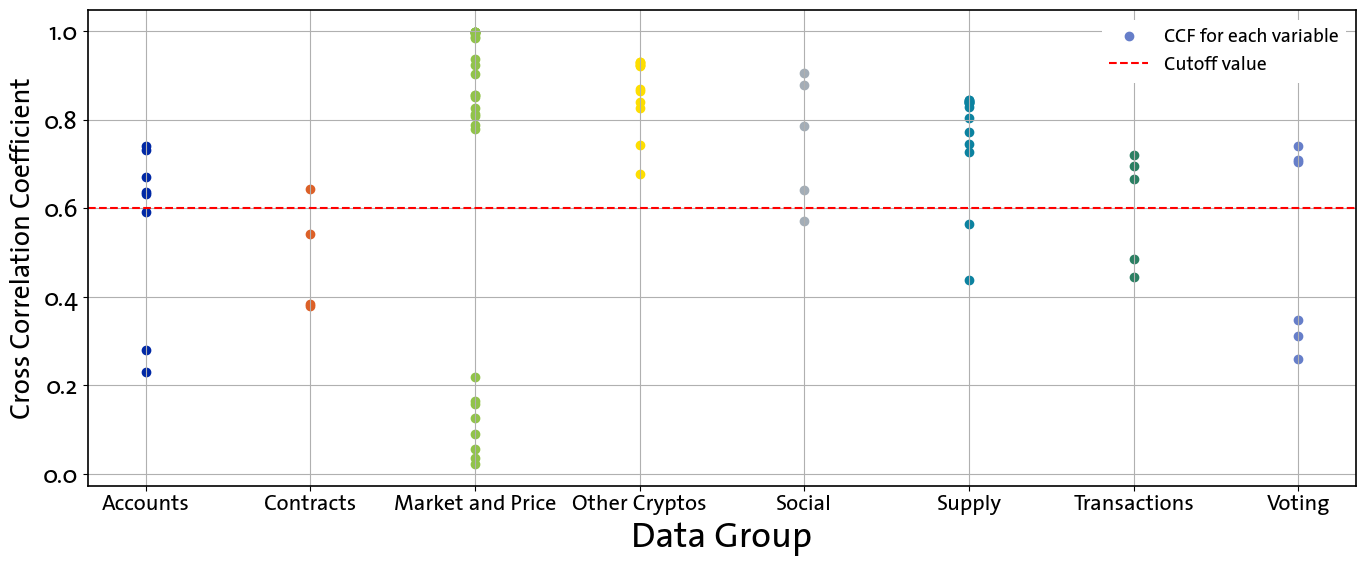

In [98]:
file_name = "../../Results/CV/Cross_correlation_results_tezos.png"
# ccf = pd.read_csv("/mnt/Ivana/Data/Tezos/CorrelationAndSegmentation/Cross_correlation_results.csv")
custom_tick_labels = variable_groups.keys()

plt.figure(figsize = (14, 6))

for i, group_name in enumerate(custom_tick_labels):
    group = variable_groups[group_name]
    ccfs = ccf_tezos[ccf_tezos.Variable.isin(group)].Correlation.tolist()
    plt.scatter([i for j in range(len(ccfs))], ccfs, marker='o', label = "CCF for each variable")

# plt.scatter(range(len(new_results.keys())), new_results.values(), marker="x", s=60, color="black")
plt.axhline(0.6, color='r', linestyle='--', label='Cutoff value')

# plt.plot(range(len(custom_tick_labels)), [0.6 for j in range(len(custom_tick_labels))], "r-")
plt.xticks(range(len(custom_tick_labels)), custom_tick_labels, fontsize=16)
plt.xlabel("Data Group")
plt.ylabel("Cross Correlation Coefficient", fontsize=20)
# plt.title("Tezos Cross Correlation Coefficients per Data Group")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = plt.legend(by_label.values(), by_label.keys(), loc="upper right", frameon=True, facecolor='white', framealpha=1, fontsize=14)
legend.get_frame().set_linewidth(0) 

plt.grid(True)
plt.tight_layout()

if file_name is not None:
    plt.savefig(file_name, bbox_inches = 'tight')
plt.show()


Casper results

/tmp/ipykernel_3490458/3691547842.py:40: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3490458/3691547842.py:43: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(file_name, bbox_inches = 'tight')
/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


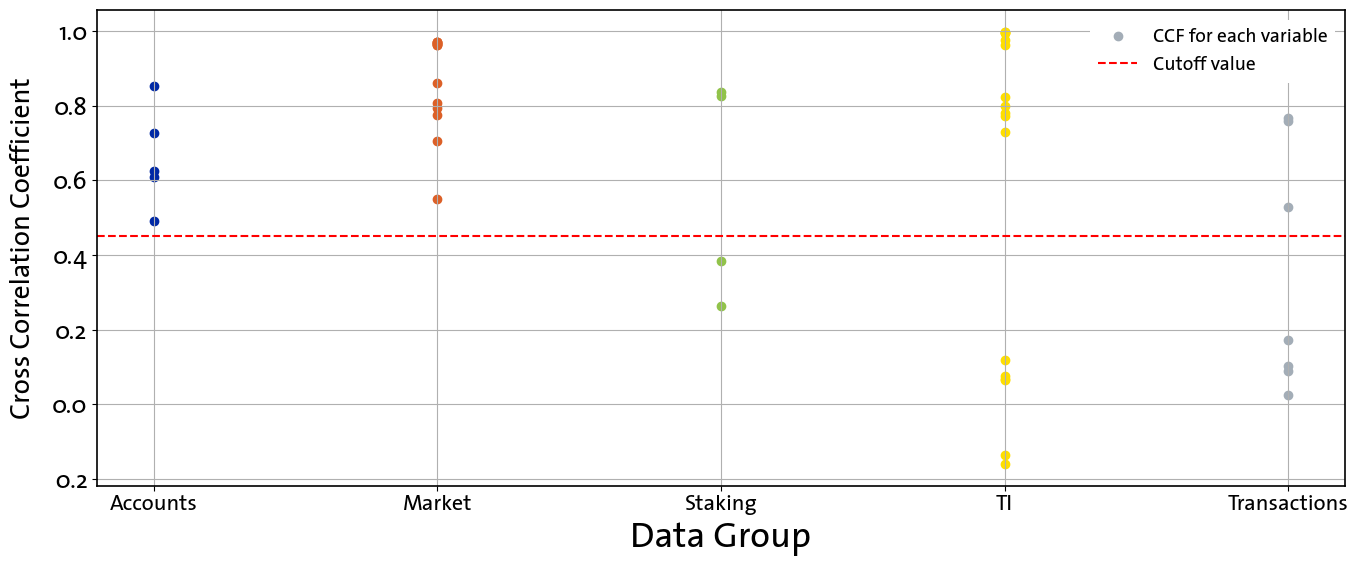

In [99]:
casper_corr_dir = "../../Data/Casper/CorrelationAndSegmentation/"

file_name ="../../Results/CV/Cross_correlation_results_casper.png"
final_data_dir = "/mnt/Ivana/Data/Casper/ReducedTimeInterval/"


ccf_casper = pd.read_csv(casper_corr_dir + "Correlation_results.csv")

variable_groups = {}
for file in sorted(os.listdir(final_data_dir)):
    df = pd.read_csv(final_data_dir + file)
    columns  = list(df.columns)
    variable_groups[file.replace(".csv", "")] = columns


custom_tick_labels = variable_groups.keys()

plt.figure(figsize = (14, 6))

for i, group_name in enumerate(custom_tick_labels):
    group = variable_groups[group_name]
    ccfs = ccf_casper[ccf_casper.Variable.isin(group)].Correlation.tolist()
    plt.scatter([i for j in range(len(ccfs))], ccfs, marker='o', label="CCF for each variable")

# plt.scatter(range(len(new_results.keys())), new_results.values(), marker="x", s=60, color="black")
plt.axhline(0.45, color='r', linestyle='--', label='Cutoff value')

# plt.plot(range(len(custom_tick_labels)), [0.6 for j in range(len(custom_tick_labels))], "r-")
plt.xticks(range(len(custom_tick_labels)), custom_tick_labels, fontsize=16)
plt.xlabel("Data Group")
plt.ylabel("Cross Correlation Coefficient", fontsize=20)
# plt.title("Casper Cross Correlation Coefficients per Data Group")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = plt.legend(by_label.values(), by_label.keys(), loc="upper right", frameon=True, facecolor='white', framealpha=1, fontsize=14)
legend.get_frame().set_linewidth(0) 

plt.grid(True)
plt.tight_layout()

if file_name is not None:
    plt.savefig(file_name, bbox_inches = 'tight')
plt.show()


## Define CC Threshold and Eliminate Variables

In [23]:
ccf2 = ccf[ccf.Correlation >= 0.6]
ccf2.to_csv(non_input_data_dir + "Cross_correlation_selected.csv", index = False)

In [92]:
ccf_casper_chosen = ccf_casper[ccf_casper.Correlation >= 0.45]
chosen_features = ccf_casper_chosen.Variable.tolist()

input_features_dir = "/mnt/Ivana/Data/Casper/ReducedTimeInterval/"
final_data_dir = "/mnt/Ivana/Data/Casper/Final/"

for file in os.listdir(input_features_dir):
    df = pd.read_csv(input_features_dir + file)
    df_cols = df.columns

    tgt_cols = [i for i in df_cols if i in chosen_features]
    if file == "Market.csv":
        tgt_cols = ["current_price"] + tgt_cols
    df = df[tgt_cols]
    df.to_csv(final_data_dir + file, index=False)

In [83]:
ccf_casper_chosen.to_csv("/mnt/Ivana/Data/Casper/CorrelationAndSegmentation/Chosen_features.csv", index=False)

## Divide data into groups

In [31]:
for k, v in variable_groups.items():
    print(k, v)

Accounts ['new_accounts', 'cleared_accounts', 'funded_accounts', 'total_accounts', 'total_funded_accounts', 'total_dust_accounts', 'total_ghost_accounts', 'total_unclaimed_accounts']
Contracts ['n_calls', 'n_new_contracts', 'total_contracts', 'total_contract_calls']
Market and Price ['market_cap', 'total_volume', 'close', 'high', 'low', 'open', 'high_low', 'high_low_pct', 'daily_change', 'daily_change_pct', 'true_range', 'ATR_7', 'ATR_14', 'ROC_3', 'ROC_7', 'ROC_30', 'SMA_3', 'SMA_7', 'SMA_30', 'EMA_3', 'EMA_7', 'EMA_30', 'MACD', 'MACD_signal', 'MACD_hist', 'RSI_7', 'RSI_14', 'STD_3', 'STD_7', 'STD_30']
Other Cryptos ['BTC_price', 'BTC_market_caps', 'BTC_total_volumes', 'ETH_price', 'ETH_market_caps', 'ETH_total_volumes', 'LTC_price', 'LTC_market_caps', 'LTC_total_volumes', 'XRP_price', 'XRP_market_caps', 'XRP_total_volumes']
Social ['twitter_followers', 'reddit_average_posts_48h', 'reddit_average_comments_48h', 'reddit_subscribers', 'reddit_accounts_active_48h']
Supply ['total', 'acti

In [34]:
print(ccf2.Variable.tolist())

['EMA_3', 'high', 'low', 'SMA_3', 'open', 'EMA_7', 'SMA_7', 'market_cap', 'EMA_30', 'SMA_30', 'ATR_14', 'LTC_price', 'LTC_market_caps', 'BTC_price', 'ATR_7', 'BTC_market_caps', 'XRP_price', 'XRP_market_caps', 'reddit_average_posts_48h', 'STD_30', 'reddit_average_comments_48h', 'ETH_price', 'ETH_market_caps', 'high_low', 'true_range', 'STD_7', 'active_staking', 'staking', 'liquid', 'BTC_total_volumes', 'circulating', 'active_delegated', 'delegated', 'activated', 'total', 'high_low_pct', 'ETH_total_volumes', 'RSI_14', 'total_volume', 'frozen', 'STD_3', 'reddit_subscribers', 'RSI_7', 'minted', 'inactive_staking', 'LTC_total_volumes', 'voting_power', 'total_dust_accounts', 'total_funded_accounts', 'inactive_delegated', 'volume', 'total_ballots', 'total_proposals', 'n_tx', 'XRP_total_volumes', 'funded_accounts', 'n_ops_failed', 'n_calls', 'reddit_accounts_active_48h', 'total_accounts', 'cleared_accounts']


In [34]:
# Define new data groups from all the variables with adequate cross correlation coefficients
market_data = ['market_cap', 'LTC_price', 'LTC_market_caps', 'BTC_price', 'BTC_market_caps', 'XRP_price', 'XRP_market_caps', 'ETH_price', 'ETH_market_caps', \
                'BTC_total_volumes', 'ETH_total_volumes', 'total_volume', 'LTC_total_volumes',  'volume', 'XRP_total_volumes', 'high']

technical_indicators = ['EMA_3',  'SMA_3', 'EMA_7', 'SMA_7', 'EMA_30', 'SMA_30', 'ATR_14', 'ATR_7', 'STD_30', 'high_low', 'true_range', 'STD_7', \
                        'high_low_pct', 'RSI_14', 'STD_3',  'RSI_7']

supply_data = ['delegated', 'minted', 'activated', 'active_staking', 'staking', 'liquid', 'circulating', 'active_delegated', 'delegated', 'total', 'frozen', \
                 'inactive_staking', 'inactive_delegated']

social = ['reddit_average_posts_48h',  'reddit_average_comments_48h', 'reddit_subscribers', 'reddit_accounts_active_48h']

voting = ['voting_power',  'total_ballots', 'total_proposals']
account = ['total_dust_accounts', 'total_funded_accounts', 'funded_accounts', 'total_accounts', 'cleared_accounts']
transactions = [ 'n_tx', 'n_ops_failed', 'n_calls']

network_activity = voting + account + transactions

variable_categories = {
    "Market": market_data,
    "TechnicalIndicators": technical_indicators,
    "SocialNetworks": social,
    "Supply": supply_data,
    "NetworkActivity":network_activity
}

In [35]:
# Load all data into one big dataframe
all_df = pd.DataFrame()
for file in os.listdir(final_data_dir):
    df = pd.read_csv(final_data_dir + file)
    all_df = pd.concat([all_df, df], axis=1)

# Select the target columns and save newly grouped data
dest_dir = "../../Data/Tezos/DataCategories/"
for k, v in variable_categories.items():
    temp_df = all_df[v]
    temp_df.to_csv(dest_dir + k + ".csv", index=False)

# CASPER